supervised_data       var1(t-6)  var2(t-6)  var3(t-6)   var4(t-6)    var5(t-6)  var6(t-6)  \
6          5.69       5.97       5.37  7281333.33  4224852.614       5.63   
7          5.30       5.34       5.07  7867306.84  4050377.943       5.07   
8          4.87       5.14       4.83  5565756.49  2763751.983       5.08   
9          5.06       5.19       4.95  4334458.33  2198327.249       5.18   
10         5.25       5.29       5.05  3721171.25  1915221.182       5.10   
...         ...        ...        ...         ...          ...        ...   
3676       3.13       3.16       3.13  1374157.76   432082.360       3.15   
3677       3.15       3.16       3.14  1560240.83   490908.221       3.15   
3678       3.14       3.15       3.12  1360415.16   426283.660       3.13   
3679       3.12       3.14       3.10  1500377.44   467690.817       3.10   
3680       3.10       3.11       3.04  2660491.55   820162.507       3.08   

      var7(t-6)  var1(t-5)  var2(t-5)  var3(t-5)  ...    va

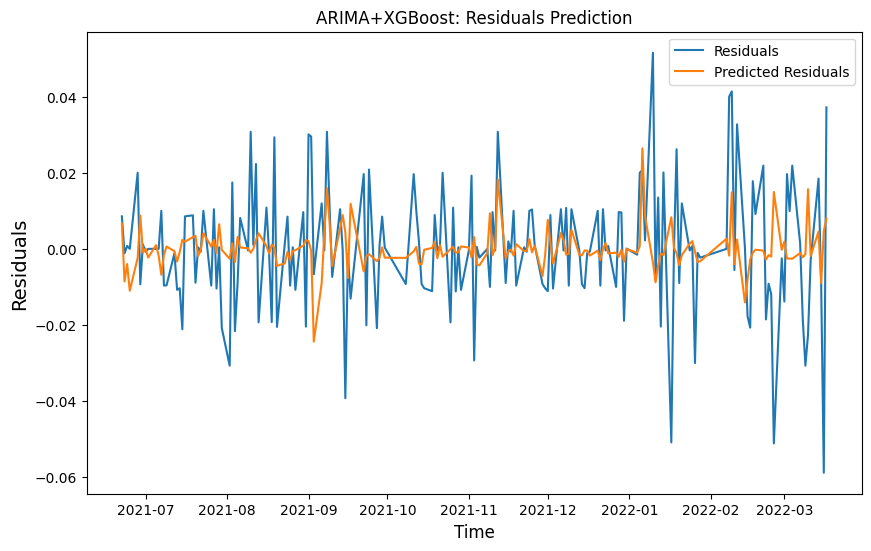

MSE: 0.00028
RMSE: 0.01687
MAE: 0.01274
R2: 0.83742


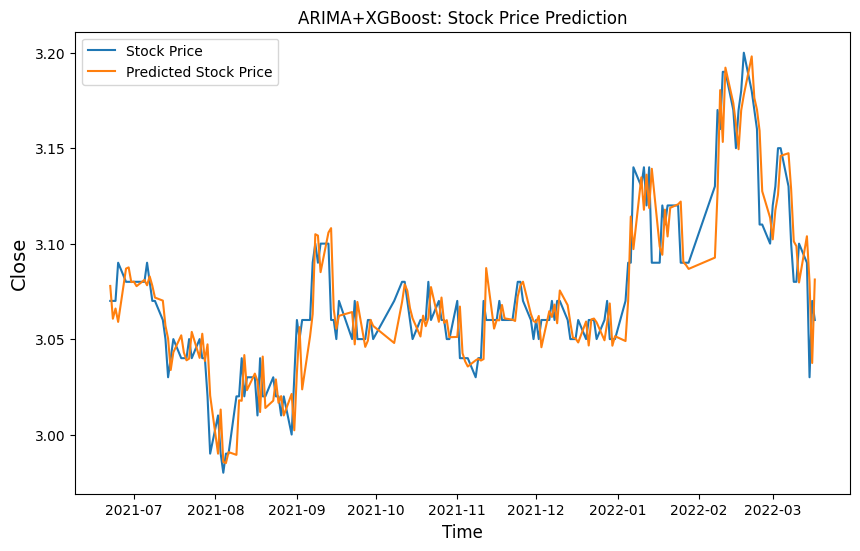

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from model import walk_forward_validation

data = pd.read_csv('./601988.SH.csv')
data.index = pd.to_datetime(data['trade_date'], format='%Y%m%d')
data = data.loc[:, ['open', 'high', 'low', 'close', 'vol', 'amount']]
# data = pd.DataFrame(data, dtype=np.float64)
close = data.pop('close')
data.insert(5, 'close', close)
data1 = data.iloc[3501:, 5]
residuals = pd.read_csv('./ARIMA_residuals1.csv')
residuals.index = pd.to_datetime(residuals['trade_date'])
residuals.pop('trade_date')
merge_data = pd.merge(data, residuals, on='trade_date')
#merge_data = merge_data.drop(labels='2007-01-04', axis=0)
time = pd.Series(data.index[3501:])

Lt = pd.read_csv('./ARIMA.csv')
Lt = Lt.drop('trade_date', axis=1)
Lt = np.array(Lt)
Lt = Lt.flatten().tolist()

train, test = prepare_data(merge_data, n_test=180, n_in=6, n_out=1)

y, yhat = walk_forward_validation(train, test)
plt.figure(figsize=(10, 6))
plt.plot(time, y[:180], label='Residuals')
plt.plot(time, yhat[:180], label='Predicted Residuals')
plt.title('ARIMA+XGBoost: Residuals Prediction')
plt.xlabel('Time', fontsize=12, verticalalignment='top')
plt.ylabel('Residuals', fontsize=14, horizontalalignment='center')
plt.legend()
plt.show()

finalpredicted_stock_price = [i + j for i, j in zip(Lt, yhat)]
#print('final', finalpredicted_stock_price)
evaluation_metric(data1, finalpredicted_stock_price)
plt.figure(figsize=(10, 6))
plt.plot(time, data1, label='Stock Price')
plt.plot(time, finalpredicted_stock_price, label='Predicted Stock Price')
plt.title('ARIMA+XGBoost: Stock Price Prediction')
plt.xlabel('Time', fontsize=12, verticalalignment='top')
plt.ylabel('Close', fontsize=14, horizontalalignment='center')
plt.legend()
plt.show()